<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithhour_withdamflowinX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
rain_data09 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/09.csv',encoding='utf-8')
rain_data10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/10.csv',encoding='utf-8')
rain_data11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/11.csv',encoding='utf-8')
rain_data12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/12.csv',encoding='utf-8')
rain_data13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/13.csv',encoding='utf-8')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/data.csv',encoding='utf-8')

In [157]:
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, how='outer'),[rain_data09, rain_data10, rain_data11, rain_data12, rain_data13])

print(rain_data)
print(data)

date = []

for rain_date in rain_data['date']:
  if rain_date not in date:
    date.append(rain_date)

print(date)

             date   hour  code name  rain
0      2009-01-16   3:00   101   춘천   0.1
1      2009-01-16   6:00   100  대관령   0.0
2      2009-01-16   6:00   101   춘천   0.2
3      2009-01-16   6:00   212   홍천   0.0
4      2009-01-16   9:00   100  대관령   0.0
...           ...    ...   ...  ...   ...
23635  2013-12-27  12:00   211   인제   0.0
23636  2013-12-27  15:00   211   인제   0.0
23637  2013-12-29  18:00   101   춘천   0.0
23638  2013-12-29  21:00   101   춘천   0.0
23639  2013-12-30   0:00   101   춘천   0.0

[23640 rows x 5 columns]
Empty DataFrame
Columns: [date, 0:00, 1:00, 2:00, 3:00, 4:00, 5:00, 6:00, 7:00, 8:00, 9:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00, dam_flow]
Index: []

[0 rows x 26 columns]
['2009-01-16', '2009-01-18', '2009-01-19', '2009-01-22', '2009-01-23', '2009-01-24', '2009-01-25', '2009-01-26', '2009-01-30', '2009-01-31', '2009-02-01', '2009-02-03', '2009-02-05', '2009-02-10', '2009-02-11', '2009-02-12', '2009-02-13'

In [158]:
data['date'] = date

data = data.fillna(0)
# data.set_index("date")
data.index = data['date']
print(data)

                  date  0:00  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  \
date                                                                           
2009-01-16  2009-01-16     0     0     0     0     0     0     0     0     0   
2009-01-18  2009-01-18     0     0     0     0     0     0     0     0     0   
2009-01-19  2009-01-19     0     0     0     0     0     0     0     0     0   
2009-01-22  2009-01-22     0     0     0     0     0     0     0     0     0   
2009-01-23  2009-01-23     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2013-12-21  2013-12-21     0     0     0     0     0     0     0     0     0   
2013-12-26  2013-12-26     0     0     0     0     0     0     0     0     0   
2013-12-27  2013-12-27     0     0     0     0     0     0     0     0     0   
2013-12-29  2013-12-29     0     0     0     0     0     0     0     0     0   
2013-12-30  2013-12-30     0     0     0

In [159]:
for l in range(len(rain_data)):
  date_value = rain_data['date'][l]
  hour_value = rain_data['hour'][l]
  code_value = rain_data['code'][l]
  rain_value = rain_data['rain'][l]
  # print(date_value, hour_value, code_value, rain_value)
  rain = data.loc[date_value][hour_value]
  if code_value == 100:
    rain_value = rain_value * 0.114
  elif code_value == 101 :
    rain_value = rain_value * 0.128
  elif code_value == 90:
    rain_value = rain_value * 0.094
  elif code_value == 211:
    rain_value = rain_value * 0.668
  rain = rain + rain_value
  data.loc[date_value, hour_value] = rain

print(data)

                  date   0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                          
2009-01-16  2009-01-16  0.000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...    ...   ...   ...     ...   ...   ...     ...   ...   
2013-12-21  2013-12-21  0.163   0.0   0.0  0.4440   0.0   0.0  0.1938   0.0   
2013-12-26  2013-12-26  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-27  2013-12-27  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-29  2013-12-29  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-30  2013-12-30  0.000   0.0   0.0  0.0000   

In [160]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/dam_flow0913.csv',encoding='utf-8')
dam_flow.set_index("date", inplace = True)
print(dam_flow)

            dam flow(㎥/s)
date                     
2009-01-01          0.000
2009-01-02          0.825
2009-01-03          3.904
2009-01-04          0.000
2009-01-05          0.000
...                   ...
2013-12-27         10.324
2013-12-28          6.111
2013-12-29          6.250
2013-12-30          7.081
2013-12-31          5.888

[1826 rows x 1 columns]


In [161]:
from functools import reduce

date_index = data.index
dam_value = dam_flow.loc[date_index]
print(dam_value)

data.rename(columns = {'date':'Date'}, inplace=True)
data = reduce(lambda x,y : pd.merge(x,y, on='date', how='outer'), [data, dam_value])

            dam flow(㎥/s)
date                     
2009-01-16          0.000
2009-01-18          0.000
2009-01-19          2.688
2009-01-22          0.957
2009-01-23          0.797
...                   ...
2013-12-21         11.636
2013-12-26          4.476
2013-12-27         10.324
2013-12-29          6.250
2013-12-30          7.081

[1043 rows x 1 columns]


In [162]:
data = data.drop(['dam_flow'], axis=1)
print(data)

                  Date   0:00  1:00  2:00    3:00  4:00  5:00    6:00  7:00  \
date                                                                          
2009-01-16  2009-01-16  0.000   0.0   0.0  0.0128   0.0   0.0  0.0256   0.0   
2009-01-18  2009-01-18  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-19  2009-01-19  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-22  2009-01-22  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2009-01-23  2009-01-23  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
...                ...    ...   ...   ...     ...   ...   ...     ...   ...   
2013-12-21  2013-12-21  0.163   0.0   0.0  0.4440   0.0   0.0  0.1938   0.0   
2013-12-26  2013-12-26  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-27  2013-12-27  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-29  2013-12-29  0.000   0.0   0.0  0.0000   0.0   0.0  0.0000   0.0   
2013-12-30  2013-12-30  0.000   0.0   0.0  0.0000   

<Axes: xlabel='date'>

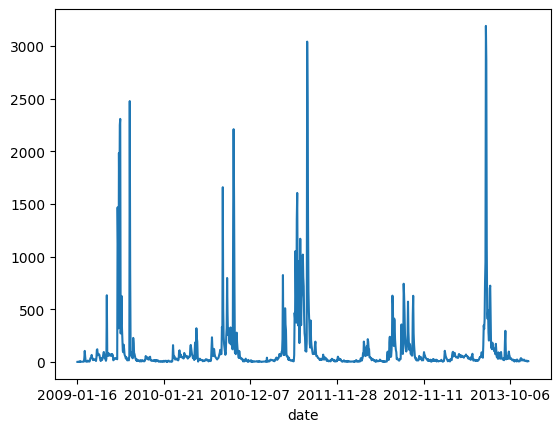

In [163]:
damflow = data['dam flow(㎥/s)']

damflow.plot()

In [164]:
print(max(data['dam flow(㎥/s)']))

3191.428


In [241]:
data['Y'] = data['dam flow(㎥/s)']
data = data.dropna()

train = data[data['Date']<'2011-12-31']
valid = data[data['Date']>='2012-01-01']
valid = valid[valid['Date']<'2013-01-01']
test = data[data['Date']>='2013-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['Date', 'Y'], axis = 1), train['Y']
trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['Date', 'Y'], axis = 1), valid['Y']
validX = validX.to_numpy()
validY = validY.to_numpy()
validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['Date','Y'], axis = 1), test['Y']
testX = testX.to_numpy()
testY = testY.to_numpy()
testX = testX.reshape(testX.shape[0], testX.shape[1],1)


train set :  615 
 valid set :  216 
 test set :  212 



In [242]:
print(trainX.shape, trainY.shape)

print(trainX)

(615, 25, 1) (615,)


array([[[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [2.688 ]],

       ...,

       [[0.428 ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [2.43  ]],

       [[0.    ],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [2.73  ]],

       [[0.0668],
        [0.    ],
        [0.    ],
        ...,
        [0.    ],
        [0.    ],
        [8.705 ]]])

In [243]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelnew = Sequential()

modelnew.add(LSTM(64, input_shape = (25,1)))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(8, 'relu'))
modelnew.add(Dense(8))
modelnew.add(Dense(1))

modelnew.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 64)                16896     
                                                                 
 dense_70 (Dense)            (None, 40)                2600      
                                                                 
 dense_71 (Dense)            (None, 40)                1640      
                                                                 
 dense_72 (Dense)            (None, 8)                 328       
                                                                 
 dense_73 (Dense)            (None, 8)                 72        
                                                                 
 dense_74 (Dense)            (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 2154

In [244]:
cp1 = ModelCheckpoint('modelnew/', save_best_only=True)
modelnew.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
modelnew.fit(trainX, trainY, batch_size = 10, epochs=50, callbacks=[cp1])

Epoch 1/50
62/62 [==============================] - ETA: 0s - loss: 127105.3281 - root_mean_squared_error: 356.5183

62/62 [==============================] - 3s 10ms/step - loss: 127105.3281 - root_mean_squared_error: 356.5183
Epoch 2/50
60/62 [============================>.] - ETA: 0s - loss: 128987.4297 - root_mean_squared_error: 359.1482

62/62 [==============================] - 1s 10ms/step - loss: 127069.2188 - root_mean_squared_error: 356.4677
Epoch 3/50
58/62 [===========================>..] - ETA: 0s - loss: 121978.9688 - root_mean_squared_error: 349.2549

62/62 [==============================] - 1s 10ms/step - loss: 126999.6250 - root_mean_squared_error: 356.3701
Epoch 4/50
60/62 [============================>.] - ETA: 0s - loss: 129398.4766 - root_mean_squared_error: 359.7200

62/62 [==============================] - 1s 10ms/step - loss: 126809.2266 - root_mean_squared_error: 356.1028
Epoch 5/50
62/62 [==============================] - ETA: 0s - loss: 126315.6562 - root_mean_squared_error: 355.4091

62/62 [==============================] - 1s 10ms/step - loss: 126315.6562 - root_mean_squared_error: 355.4091
Epoch 6/50
58/62 [===========================>..] - ETA: 0s - loss: 125816.1797 - root_mean_squared_error: 354.7058

62/62 [==============================] - 1s 10ms/step - loss: 125192.9219 - root_mean_squared_error: 353.8261
Epoch 7/50
58/62 [===========================>..] - ETA: 0s - loss: 112089.9453 - root_mean_squared_error: 334.7984

62/62 [==============================] - 1s 10ms/step - loss: 123281.8594 - root_mean_squared_error: 351.1152
Epoch 8/50
61/62 [============================>.] - ETA: 0s - loss: 121752.0547 - root_mean_squared_error: 348.9299

62/62 [==============================] - 1s 10ms/step - loss: 120763.9844 - root_mean_squared_error: 347.5111
Epoch 9/50
61/62 [============================>.] - ETA: 0s - loss: 118549.3516 - root_mean_squared_error: 344.3100

62/62 [==============================] - 1s 10ms/step - loss: 117826.9531 - root_mean_squared_error: 343.2593
Epoch 10/50
59/62 [===========================>..] - ETA: 0s - loss: 109183.1016 - root_mean_squared_error: 330.4286

62/62 [==============================] - 1s 10ms/step - loss: 114267.3281 - root_mean_squared_error: 338.0345
Epoch 11/50
59/62 [===========================>..] - ETA: 0s - loss: 112672.4375 - root_mean_squared_error: 335.6671

62/62 [==============================] - 1s 11ms/step - loss: 110151.1406 - root_mean_squared_error: 331.8903
Epoch 12/50
62/62 [==============================] - ETA: 0s - loss: 105008.2656 - root_mean_squared_error: 324.0498

62/62 [==============================] - 1s 15ms/step - loss: 105008.2656 - root_mean_squared_error: 324.0498
Epoch 13/50
62/62 [==============================] - ETA: 0s - loss: 99512.8672 - root_mean_squared_error: 315.4566 

62/62 [==============================] - 1s 16ms/step - loss: 99512.8672 - root_mean_squared_error: 315.4566
Epoch 14/50
62/62 [==============================] - ETA: 0s - loss: 94072.5625 - root_mean_squared_error: 306.7125

62/62 [==============================] - 1s 16ms/step - loss: 94072.5625 - root_mean_squared_error: 306.7125
Epoch 15/50
61/62 [============================>.] - ETA: 0s - loss: 88894.8125 - root_mean_squared_error: 298.1523

62/62 [==============================] - 1s 15ms/step - loss: 88181.5703 - root_mean_squared_error: 296.9538
Epoch 16/50
58/62 [===========================>..] - ETA: 0s - loss: 66431.5625 - root_mean_squared_error: 257.7432

62/62 [==============================] - 1s 10ms/step - loss: 82386.2031 - root_mean_squared_error: 287.0300
Epoch 17/50
62/62 [==============================] - ETA: 0s - loss: 77012.8750 - root_mean_squared_error: 277.5119

62/62 [==============================] - 1s 10ms/step - loss: 77012.8750 - root_mean_squared_error: 277.5119
Epoch 18/50
62/62 [==============================] - ETA: 0s - loss: 71759.0156 - root_mean_squared_error: 267.8787

62/62 [==============================] - 1s 11ms/step - loss: 71759.0156 - root_mean_squared_error: 267.8787
Epoch 19/50
61/62 [============================>.] - ETA: 0s - loss: 66704.0391 - root_mean_squared_error: 258.2712

62/62 [==============================] - 1s 10ms/step - loss: 66162.0000 - root_mean_squared_error: 257.2198
Epoch 20/50
58/62 [===========================>..] - ETA: 0s - loss: 58110.0820 - root_mean_squared_error: 241.0603

62/62 [==============================] - 1s 10ms/step - loss: 61091.9141 - root_mean_squared_error: 247.1678
Epoch 21/50
60/62 [============================>.] - ETA: 0s - loss: 57598.4141 - root_mean_squared_error: 239.9967

62/62 [==============================] - 1s 11ms/step - loss: 56193.6328 - root_mean_squared_error: 237.0520
Epoch 22/50
61/62 [============================>.] - ETA: 0s - loss: 51924.0938 - root_mean_squared_error: 227.8686

62/62 [==============================] - 1s 10ms/step - loss: 51502.5195 - root_mean_squared_error: 226.9417
Epoch 23/50
61/62 [============================>.] - ETA: 0s - loss: 47377.0312 - root_mean_squared_error: 217.6627

62/62 [==============================] - 1s 11ms/step - loss: 46991.8984 - root_mean_squared_error: 216.7762
Epoch 24/50
59/62 [===========================>..] - ETA: 0s - loss: 44560.6055 - root_mean_squared_error: 211.0938

62/62 [==============================] - 1s 10ms/step - loss: 43065.6406 - root_mean_squared_error: 207.5226
Epoch 25/50
57/62 [==========================>...] - ETA: 0s - loss: 37298.7812 - root_mean_squared_error: 193.1289

62/62 [==============================] - 1s 10ms/step - loss: 39152.3906 - root_mean_squared_error: 197.8696
Epoch 26/50
59/62 [===========================>..] - ETA: 0s - loss: 32677.1211 - root_mean_squared_error: 180.7681

62/62 [==============================] - 1s 10ms/step - loss: 35600.9648 - root_mean_squared_error: 188.6822
Epoch 27/50
58/62 [===========================>..] - ETA: 0s - loss: 34106.9258 - root_mean_squared_error: 184.6806

62/62 [==============================] - 1s 11ms/step - loss: 32167.5488 - root_mean_squared_error: 179.3531
Epoch 28/50
58/62 [===========================>..] - ETA: 0s - loss: 27901.9004 - root_mean_squared_error: 167.0386

62/62 [==============================] - 1s 10ms/step - loss: 28998.2969 - root_mean_squared_error: 170.2889
Epoch 29/50
61/62 [============================>.] - ETA: 0s - loss: 26287.3184 - root_mean_squared_error: 162.1336

62/62 [==============================] - 1s 10ms/step - loss: 26250.2852 - root_mean_squared_error: 162.0194
Epoch 30/50
58/62 [===========================>..] - ETA: 0s - loss: 24799.7461 - root_mean_squared_error: 157.4794

62/62 [==============================] - 1s 10ms/step - loss: 23621.7949 - root_mean_squared_error: 153.6938
Epoch 31/50
60/62 [============================>.] - ETA: 0s - loss: 21824.4551 - root_mean_squared_error: 147.7310

62/62 [==============================] - 1s 15ms/step - loss: 21293.8965 - root_mean_squared_error: 145.9243
Epoch 32/50
61/62 [============================>.] - ETA: 0s - loss: 19328.3926 - root_mean_squared_error: 139.0266

62/62 [==============================] - 1s 16ms/step - loss: 19171.2578 - root_mean_squared_error: 138.4603
Epoch 33/50
59/62 [===========================>..] - ETA: 0s - loss: 12648.7754 - root_mean_squared_error: 112.4668

62/62 [==============================] - 1s 17ms/step - loss: 17293.8145 - root_mean_squared_error: 131.5059
Epoch 34/50
60/62 [============================>.] - ETA: 0s - loss: 15899.9434 - root_mean_squared_error: 126.0950

62/62 [==============================] - 1s 16ms/step - loss: 15514.6387 - root_mean_squared_error: 124.5578
Epoch 35/50
59/62 [===========================>..] - ETA: 0s - loss: 14556.2695 - root_mean_squared_error: 120.6494

62/62 [==============================] - 1s 10ms/step - loss: 13964.7510 - root_mean_squared_error: 118.1725
Epoch 36/50
59/62 [===========================>..] - ETA: 0s - loss: 13003.7852 - root_mean_squared_error: 114.0341

62/62 [==============================] - 1s 10ms/step - loss: 12475.5107 - root_mean_squared_error: 111.6938
Epoch 37/50
59/62 [===========================>..] - ETA: 0s - loss: 11742.3652 - root_mean_squared_error: 108.3622

62/62 [==============================] - 1s 11ms/step - loss: 11265.2617 - root_mean_squared_error: 106.1379
Epoch 38/50
59/62 [===========================>..] - ETA: 0s - loss: 9544.7588 - root_mean_squared_error: 97.6973  

62/62 [==============================] - 1s 11ms/step - loss: 10146.6582 - root_mean_squared_error: 100.7306
Epoch 39/50
57/62 [==========================>...] - ETA: 0s - loss: 9987.5127 - root_mean_squared_error: 99.9375  

62/62 [==============================] - 1s 11ms/step - loss: 9258.2520 - root_mean_squared_error: 96.2198
Epoch 40/50
59/62 [===========================>..] - ETA: 0s - loss: 8659.6846 - root_mean_squared_error: 93.0574

62/62 [==============================] - 1s 10ms/step - loss: 8309.6084 - root_mean_squared_error: 91.1571
Epoch 41/50
61/62 [============================>.] - ETA: 0s - loss: 7496.1440 - root_mean_squared_error: 86.5803

62/62 [==============================] - 1s 10ms/step - loss: 7435.2617 - root_mean_squared_error: 86.2280
Epoch 42/50
58/62 [===========================>..] - ETA: 0s - loss: 7251.3364 - root_mean_squared_error: 85.1548

62/62 [==============================] - 1s 10ms/step - loss: 6839.4512 - root_mean_squared_error: 82.7010
Epoch 43/50
59/62 [===========================>..] - ETA: 0s - loss: 6365.3608 - root_mean_squared_error: 79.7832

62/62 [==============================] - 1s 10ms/step - loss: 6107.1807 - root_mean_squared_error: 78.1485
Epoch 44/50
62/62 [==============================] - ETA: 0s - loss: 5524.5542 - root_mean_squared_error: 74.3273

62/62 [==============================] - 1s 11ms/step - loss: 5524.5542 - root_mean_squared_error: 74.3273
Epoch 45/50
62/62 [==============================] - ETA: 0s - loss: 4853.1616 - root_mean_squared_error: 69.6646

62/62 [==============================] - 1s 11ms/step - loss: 4853.1616 - root_mean_squared_error: 69.6646
Epoch 46/50
61/62 [============================>.] - ETA: 0s - loss: 4554.2183 - root_mean_squared_error: 67.4849

62/62 [==============================] - 1s 11ms/step - loss: 4517.2393 - root_mean_squared_error: 67.2104
Epoch 47/50
62/62 [==============================] - ETA: 0s - loss: 3974.1187 - root_mean_squared_error: 63.0406

62/62 [==============================] - 1s 11ms/step - loss: 3974.1187 - root_mean_squared_error: 63.0406
Epoch 48/50
59/62 [===========================>..] - ETA: 0s - loss: 3207.6091 - root_mean_squared_error: 56.6358

62/62 [==============================] - 1s 10ms/step - loss: 3496.1670 - root_mean_squared_error: 59.1284
Epoch 49/50
60/62 [============================>.] - ETA: 0s - loss: 3557.1951 - root_mean_squared_error: 59.6422

62/62 [==============================] - 1s 11ms/step - loss: 3472.9290 - root_mean_squared_error: 58.9316
Epoch 50/50
59/62 [===========================>..] - ETA: 0s - loss: 3178.8838 - root_mean_squared_error: 56.3816

62/62 [==============================] - 1s 15ms/step - loss: 3051.9485 - root_mean_squared_error: 55.2444


In [246]:
train_score = modelnew.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

7/7 [==============================] - 0s 5ms/step - loss: 9438.2637 - root_mean_squared_error: 97.1507
Train Score: 9438.26 MSE (97.15 RMSE)


In [247]:
# from tensorflow.keras.models import load_model
# model = load_model('model/')

train_predictions = modelnew.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

20/20 [==============================] - 1s 5ms/step


,Train Predictions,Actuals
0,1.572543,0.000
1,1.572540,0.000
2,2.804865,2.688
3,1.779468,0.957
4,1.728964,0.797
...,...,...
610,7.004690,8.320
611,7.375709,8.726
612,2.639837,2.430
613,2.832299,2.730


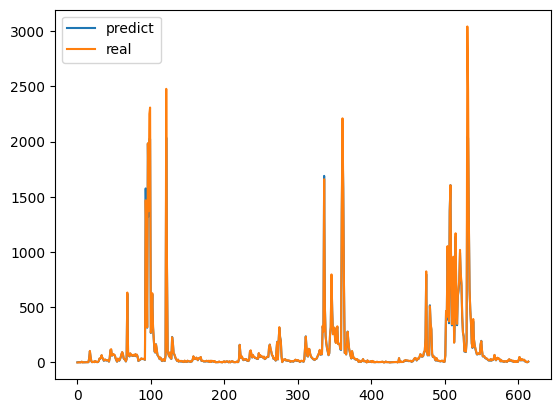

In [248]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:])
plt.plot(train_results['Actuals'][:])

plt.legend(['predict','real'])

In [249]:
val_predictions = modelnew.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

7/7 [==============================] - 0s 5ms/step


,Val Predictions,Actuals
0,7.566171,8.935
1,13.359737,15.280
2,3.602769,3.912
3,3.112494,3.159
4,4.652493,5.490
...,...,...
211,8.262107,9.702
212,13.850680,15.811
213,8.470646,9.933
214,19.935747,21.626


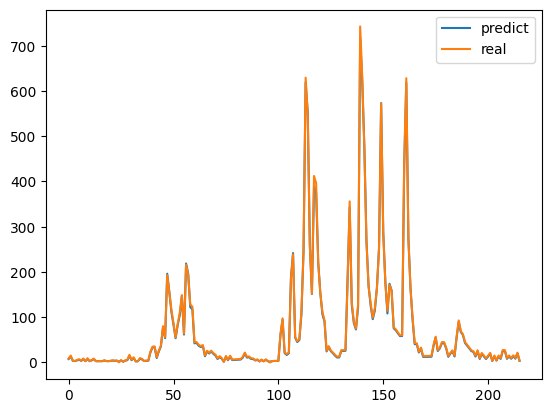

In [250]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:])

plt.legend(['predict','real'])

In [251]:
test_predictions = modelnew.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

7/7 [==============================] - 0s 6ms/step


,Test Predictions,Actuals
0,14.280294,16.243
1,8.685143,10.171
2,8.911129,10.422
3,3.948420,4.445
4,7.098040,8.422
...,...,...
207,9.996306,11.636
208,3.968483,4.476
209,8.823024,10.324
210,5.167366,6.250


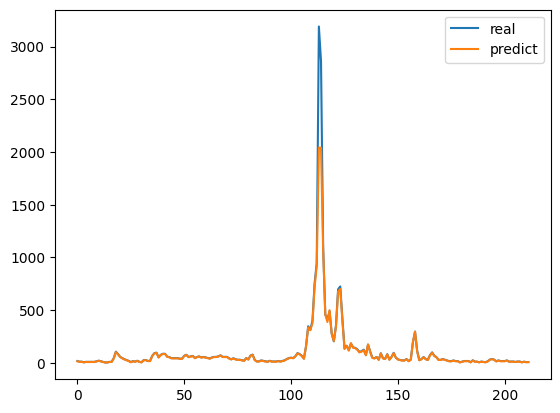

In [252]:
plt.plot(test_results['Actuals'][:])
plt.plot(test_results['Test Predictions'][:])

plt.legend(['real', 'predict'])